In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import requests
import bs4

In [5]:
import textblob
!pip install bs4


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
wiki=requests.get("https://en.wikipedia.org/wiki/India")

In [7]:
from bs4 import BeautifulSoup

In [8]:
india=BeautifulSoup(wiki.content,'html.parser')

In [9]:
india=india.getText(strip=True)

In [10]:
india

'India - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Etymology2HistoryToggle History subsection2.1Ancient India2.2Medieval India2.3Early modern India2.4Modern India3Geography4Biodiversity5Politics and governmentToggle Politics and government subsection5.1Politics5.2Government5.3Administrative divisions5.3.1States5.3.2Union territories6Foreign, economic and strategic relations7EconomyToggle Economy subsection7.1Industries7.2Energy7.3Socio-economic challenges8Demographics, languages, and religion9CultureToggle Culture subsection9.1Visual art9.2Architecture9.3Literature9.4Performing arts and media9

In [11]:
import re

In [12]:
india=re.sub(r'\[\d+\]',"",india)

In [13]:
india=re.sub(r'\[\d+\]',"",india)

In [14]:
india=re.sub('[0-9]+',"",india)

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import nltk

In [62]:
from nltk.tokenize import sent_tokenize

In [63]:
sentence=sent_tokenize(india)

In [64]:
len(sentence)

842

In [65]:
sentence

["India - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)EtymologyHistoryToggle History subsection.Ancient India.Medieval India.Early modern India.Modern IndiaGeographyBiodiversityPolitics and governmentToggle Politics and government subsection.Politics.Government.Administrative divisions..States..Union territoriesForeign, economic and strategic relationsEconomyToggle Economy subsection.Industries.Energy.Socio-economic challengesDemographics, languages, and religionCultureToggle Culture subsection.Visual art.Architecture.Literature.Performing arts and media.Society.Education.Clothing.Cuisine.Sports 

In [21]:
from textblob import TextBlob

In [22]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'positive'
    if analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'
    

In [66]:
sentence=pd.DataFrame(sentence)

In [67]:
sentence.columns=['sentence']

In [68]:
sentence['sentiment']=[str(analyze_sentiment(x)) for x in sentence.sentence]

In [69]:
sentence.sentiment.value_counts()

sentiment
Neutral     507
positive    259
Negative     76
Name: count, dtype: int64

In [27]:
from nltk.tokenize import word_tokenize

In [28]:
indiawords=word_tokenize(india)

In [29]:
indiawords=[word for word in indiawords if word.isalnum()]

In [30]:
from nltk.corpus import stopwords

In [31]:
stop_words=set(stopwords.words('english'))

In [32]:
indiawords=[word for word in indiawords if not str.lower(word) in stop_words]

In [33]:
from nltk.probability import FreqDist

In [34]:
wordFr=FreqDist(indiawords)

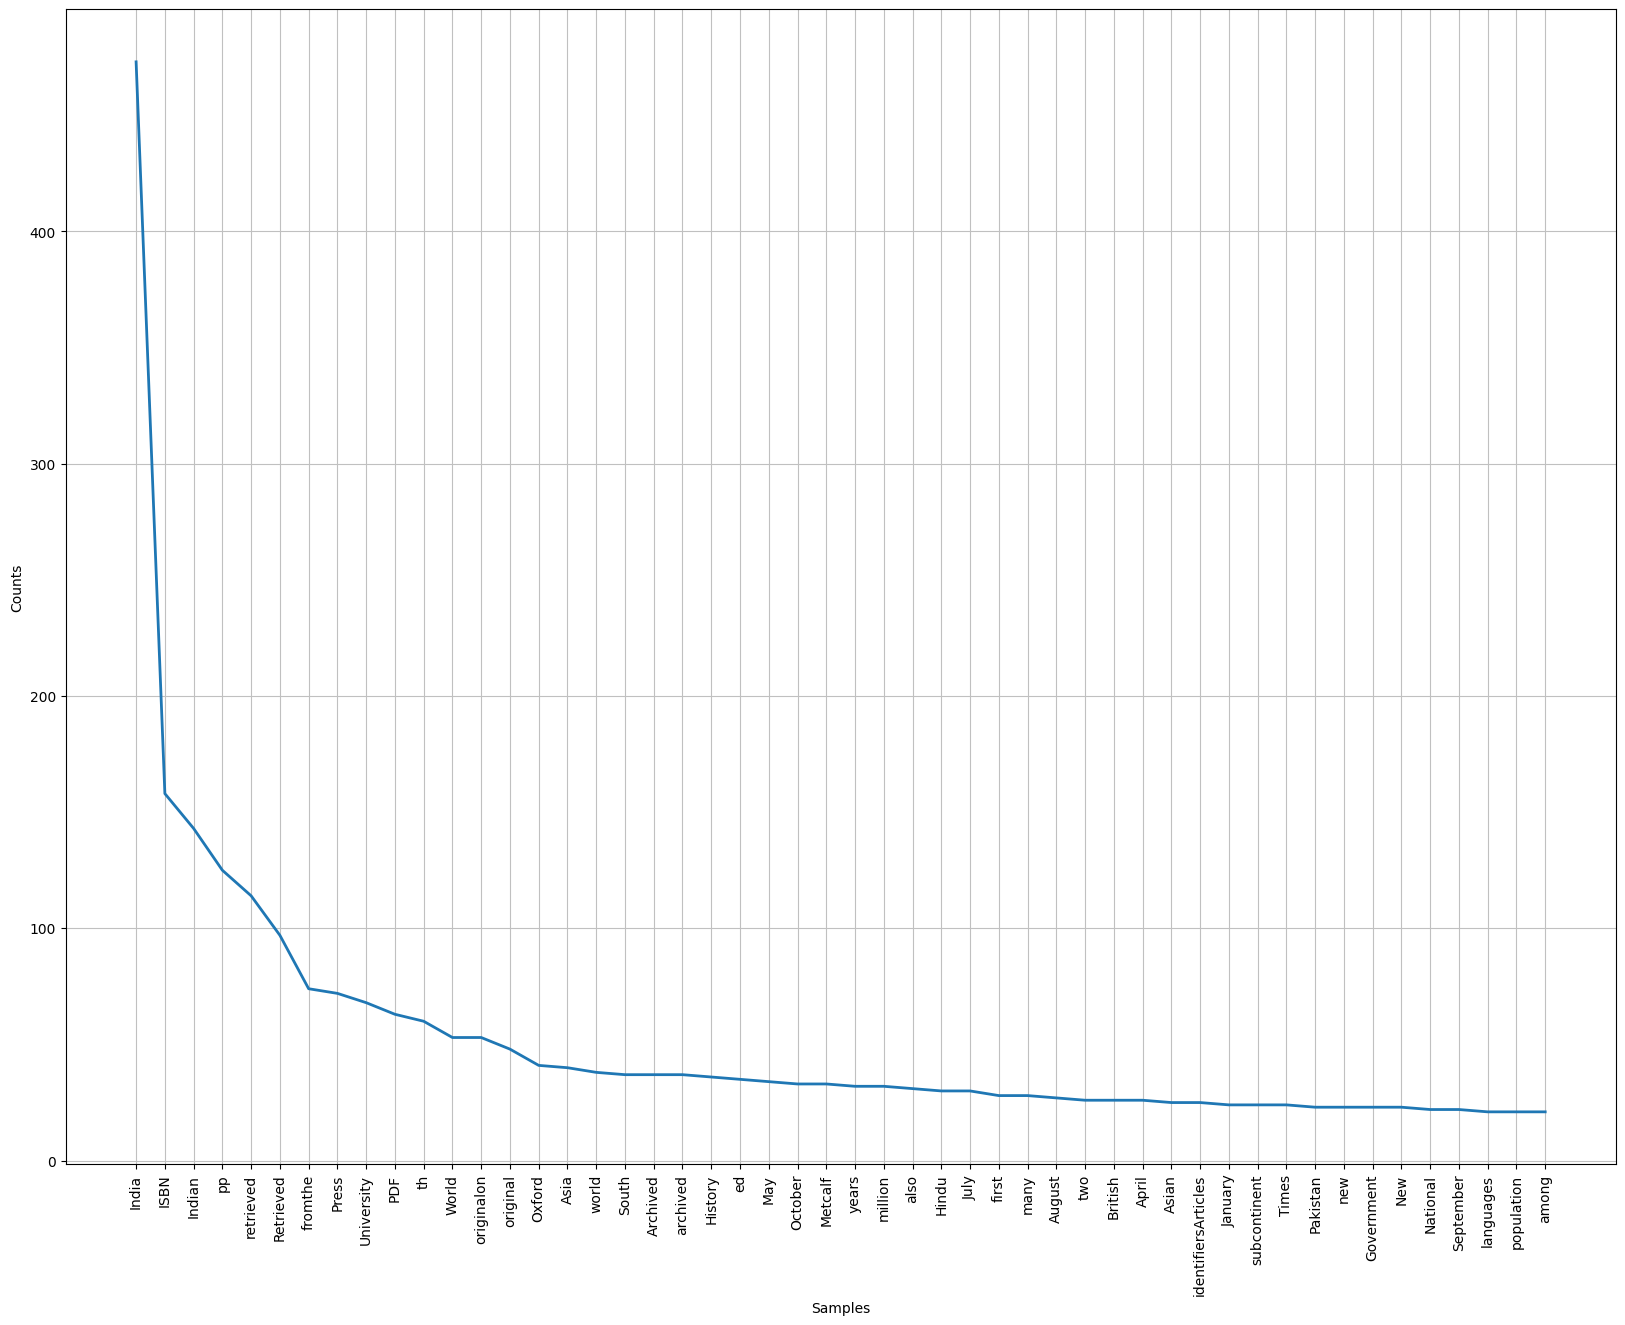

<Axes: xlabel='Samples', ylabel='Counts'>

In [35]:
plt.figure(figsize=(20,15))
wordFr.plot(50,cumulative=False)

In [36]:
indiawords=[w for w in indiawords if not w in ['ISBN','pp','PDF','fromthe','ed','th','also','press']]

In [38]:
pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     -------                                 30.7/151.4 kB 1.3 MB/s eta 0:00:01
     -----------------------------------    143.4/151.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from wordcloud import WordCloud, STOPWORDS


In [53]:
india_words=(" ").join(indiawords)

In [43]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


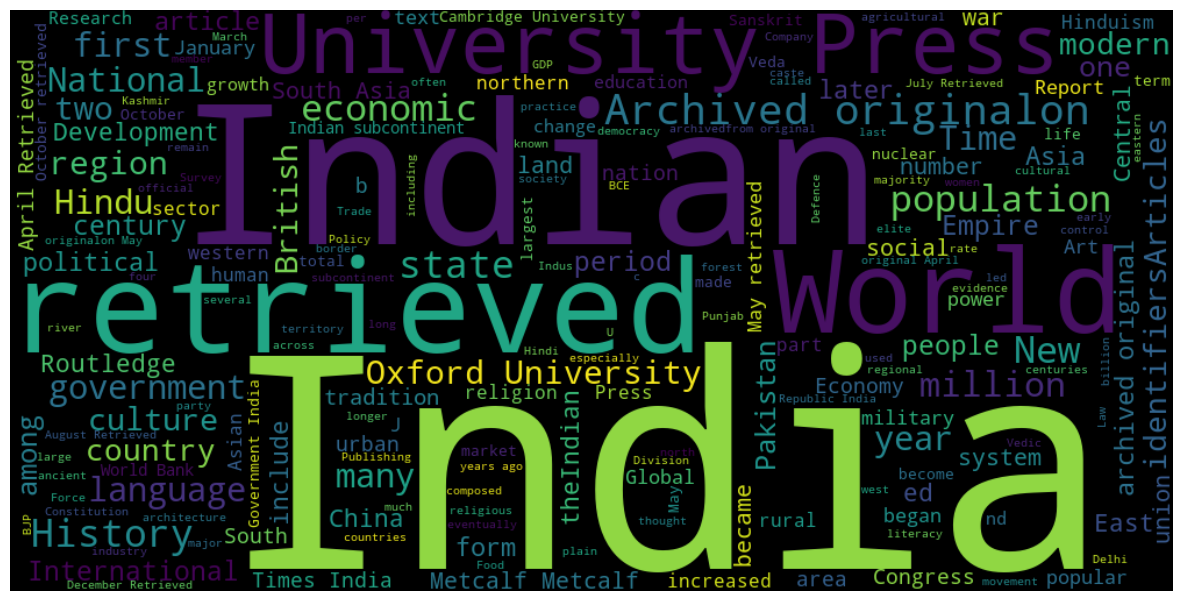

In [61]:

wordcloud=WordCloud(width=1000,height=500).generate(india_words)
plt.figure(figsize=(15,8))
plt.plot()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()